# Name : Jung-Hyun Lee
# Student ID : 2018120206
# link : https://github.com/JungHyun-L/DataMining

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define least square approximation function: $ \hat{x}=(A^{\rm T}A)^{-1}A^{\rm T}b$

In [2]:
def leastsquareApprox(xMat,yMat) :
    xTx= np.dot(xMat.T,xMat)
    middle=np.dot(np.linalg.inv(xTx),xMat.T)
    ws=np.dot(middle,yMat)
    return (ws)

# define the function automatically generating  $A$ according to degree

In [3]:
def genMat(degree,x) :
    if degree==0:
        print("차수는 1 이상이여야 합니다")
    
    oneVec=np.ones(x.size)
    oneVec=np.reshape(oneVec,(x.size,1))
    xMat= oneVec
    
    for i in range(degree):
        result=np.reshape(x**(i+1),(x.size,1))
        xMat=np.hstack((xMat,result))
    
    return(xMat)

# $ A +\sqrt{\lambda}I$ 를 만드는 함수

In [4]:
def genRegMat(la,degree,x):
    A= genMat(degree,x)
    
    #I를 우선 만듬
    I= np.identity(np.size(A,1))
    
    # square root lambda
    sqrtla= la**(1/2.0)
    
    # A+ root square lambda I 만들기
    newA=np.concatenate((A,sqrtla*I), axis=0)
    
    return(newA)

# $ y + 0$ 를 만드는 함수

In [5]:
def genYMat(A_size,y):
    
    zeroVec= np.zeros(A_size)
    
    zeroMat=np.reshape(zeroVec,(zeroVec.size,1))
    
    newY=np.concatenate((y,zeroVec), axis=0)
    
    return(newY)

# $ yHat$ 를 만드는 함수

In [6]:
def genYHat(la,degree,x,y1):
    
    A=genMat(degree,x)
    newA= genRegMat(la,degree,x)
    newY= genYMat(degree+1,y1)

    ws=leastsquareApprox(newA,newY)
    yHat=np.dot(A,ws)
    
    return(yHat)

# plot the noisy and clean data

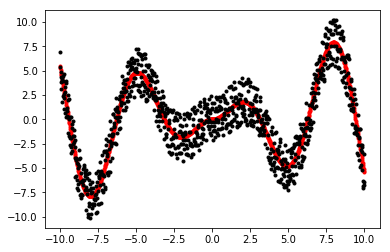

In [7]:
num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'r.', x, y2, 'k.')
plt.show()

# Plot the polynomial curves that fit the noisy data by the least square error with varying p = 6,7,8,9 and $\lambda$ =1

Text(0.5,1,'degree=7')

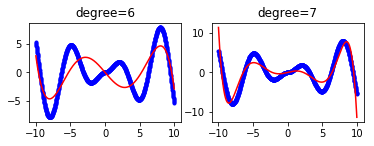

In [8]:
la =1

plt.subplot(221)
plt.plot(x, y1, 'b.', x, genYHat(la,6,x,y1), 'r-')
plt.title('degree=6')


plt.subplot(222)
plt.plot(x, y1, 'b.', x, genYHat(la,7,x,y1), 'r-')
plt.title('degree=7')


Text(0.5,1,'degree=9')

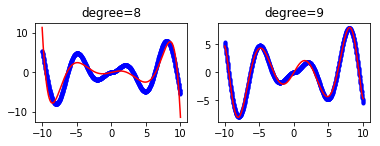

In [9]:
plt.subplot(221)
plt.plot(x, y1, 'b.', x, genYHat(la,8,x,y1), 'r-')
plt.title('degree=8')


plt.subplot(222)
plt.plot(x, y1, 'b.', x, genYHat(la,9,x,y1), 'r-')
plt.title('degree=9')


# Plot the polynomial curves that fit the noisy data by the least square error with varying $\lambda$ = $2^{-3},2^{-1},2^{1},2^{3}$ and p= 9

Text(0.5,1,'lambda=2^-1')

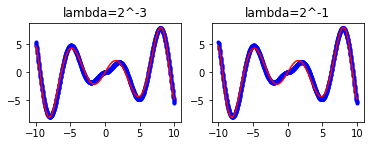

In [10]:
plt.subplot(221)
plt.plot(x, y1, 'b.', x, genYHat(2**-3,9,x,y1), 'r-')
plt.title('lambda=2^-3')


plt.subplot(222)
plt.plot(x, y1, 'b.', x, genYHat(2**-1,9,x,y1), 'r-')
plt.title('lambda=2^-1')

Text(0.5,1,'lambda=2^3')

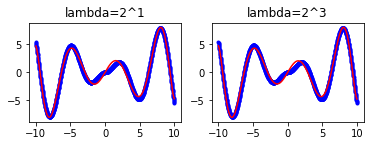

In [11]:
plt.subplot(221)
plt.plot(x, y1, 'b.', x, genYHat(2,9,x,y1), 'r-')
plt.title('lambda=2^1')


plt.subplot(222)
plt.plot(x, y1, 'b.', x, genYHat(2**3,9,x,y1), 'r-')
plt.title('lambda=2^3')

# Plot the energy with varying  $\lambda$

In [12]:
error=[]
for i in range(8):
    newError= np.linalg.norm(genYHat(2**(i-3),9,x,y1) - y1)
    error.append(newError)

la= []
for i in range(8):
    newLa= i-3
    la.append(newLa)


Text(0,0.5,'error')

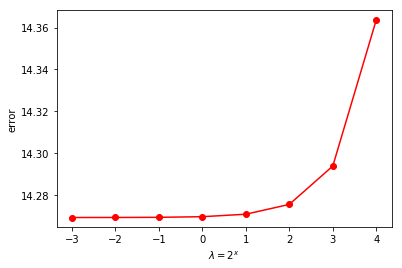

In [13]:
plt.plot(la, error,'ro-')
plt.xlabel('$\lambda=2^x$')
plt.ylabel('error')